In [1]:
import tensorflow as tf
import sklearn as sk
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import random

# 1. The datasets: CIFAR-3

In [2]:
X = np.load('X_cifar.npy')
X_gray = np.load('X_cifar_grayscale.npy')
Y = np.load('Y_cifar.npy')
print("Dimensions de X : ", np.shape(X))
print("Dimensions de X_gray : ", np.shape(X_gray))
print("Dimensions de Y : ", np.shape(Y))

Dimensions de X :  (18000, 32, 32, 3)
Dimensions de X_gray :  (18000, 32, 32)
Dimensions de Y :  (18000,)


In [3]:
print("Valeur minimale : ", np.min(X))
print("Valeur maximale : ", np.max(X))

Valeur minimale :  0
Valeur maximale :  255


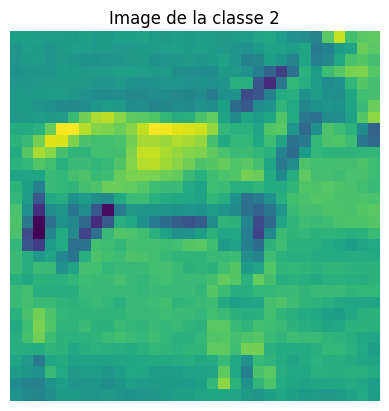

<Figure size 640x480 with 0 Axes>

In [4]:
nb_sample = random.randint(0, 17999)
plt.imshow(X_gray[nb_sample])
img_title='Image de la classe ' + str(Y[nb_sample])
plt.title(img_title)
plt.axis('off')
plt.show()
plt.clf()

In [5]:
# Normalisation
X= X/255. # . pour rester en float
X_gray = X_gray/255.

In [6]:
print("Valeur minimale : ", np.min(X))
print("Valeur maximale : ", np.max(X))

Valeur minimale :  0.0
Valeur maximale :  1.0


In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, shuffle = True)
X_gray_train, X_gray_test, Y_gray_train, Y_gray_test = train_test_split(X_gray, Y, test_size=0.25, shuffle = True)

print("Dimensions de X_gray_train : ", np.shape(X_gray_train))

Dimensions de X_gray_train :  (13500, 32, 32)


# 2. DIMENSIONALITY REDUCTION WITH THE PCA

In [8]:
X = np.load('X_cifar.npy')
X_gray = np.load('X_cifar_grayscale.npy')
Y = np.load('Y_cifar.npy')

In [9]:
n_components_tab = [10, 20, 50, 100, 500]
X_gray = np.reshape(X_gray,(np.shape(X_gray)[0],32*32))
nb_sample = random.randint(0, np.shape(X_gray)[0])

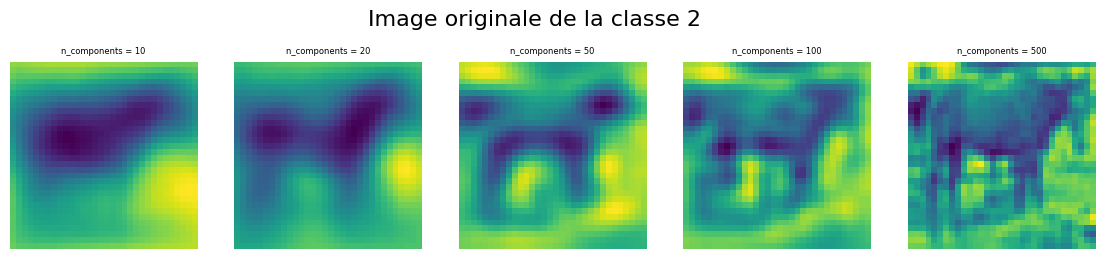

<Figure size 640x480 with 0 Axes>

In [10]:
plt.figure(figsize=(14, 3))
for i in range(len(n_components_tab)):
    pca = sk.decomposition.PCA(n_components=n_components_tab[i])
    pca.fit(X_gray)
    X_gray_reduced = pca.transform(X_gray)
    X_reduced_img = pca.inverse_transform(X_gray_reduced)
    # print(pca.explained_variance_ratio_)
    # print("Dimensions de X_gray_reduced : ", np.shape(X_gray_reduced))
    # print("Dimensions de X_reduced_img : ", np.shape(X_reduced_img))
    plt.subplot(1, 5, i+1)
    plt. imshow(np.reshape(X_reduced_img[nb_sample],(32,32)))
    plt.axis('off')  # Désactiver les axes
    plt.title('n_components = ' + str(n_components_tab[i]), fontsize=6)
plt.suptitle("Image originale de la classe " + str(Y[nb_sample]), fontsize=16)
plt.show()
plt.clf()

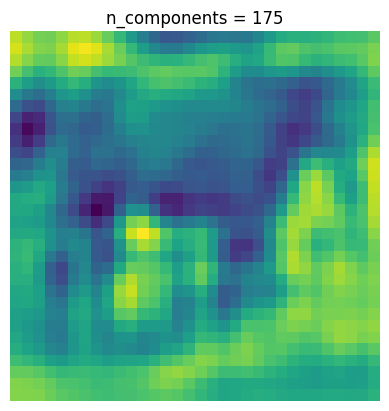

In [11]:
# Réalisations de PCA sur les images en couleur
pca_full = sk.decomposition.PCA()
pca_full.fit(X_gray)

# Calcul de la variance cumulée
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
n_components_95 = np.where(cumulative_variance >= 0.95)[0][0] + 1

# Réalisation de PCA avec 95% de variance expliquée
pca_95 = sk.decomposition.PCA(n_components=n_components_95)
pca_95.fit(X_gray)
X_gray_reduced = pca_95.transform(X_gray)
X_reduced_img = pca_95.inverse_transform(X_gray_reduced)

# Affichage de l'image
plt.imshow(np.reshape(X_reduced_img[nb_sample], (32, 32)))
plt.axis('off')
plt.title('n_components = ' + str(n_components_95))
plt.show()

# 3. Supervised machine learning

## 3.1. Logistic Regression & Gaussian Naïve Bayes Classifier

In [12]:
X=np.load('X_cifar_grayscale.npy')
Y=np.load('Y_cifar.npy')

X_train, X_test, y_train, y_test = train_test_split(X/255., Y, test_size=0.20, shuffle = True)
X_train = np.reshape(X_train,(np.shape(X_train)[0],32*32))
X_test = np.reshape(X_test,(np.shape(X_test)[0],32*32))

Ci-dessous, voici les classification naïve bayésienne et la régression logistique sur le dataset non compressé.

In [13]:
# Création de la classification bayésienne naïve
nb_classifier = GaussianNB()

# Entraînement du modèle
nb_classifier.fit(X_train, y_train)

# Prédiction sur les données d'entraînement et de test
y_pred = nb_classifier.predict(X_test)

# Calcul de l'accuracy
accuracy_train = nb_classifier.score(X_train, y_train)
accuracy_test = nb_classifier.score(X_test, y_test)

print("Accuracy entraînement:", accuracy_train)
print("Accuracy test:", accuracy_test)


Accuracy entraînement: 0.5866666666666667
Accuracy test: 0.5794444444444444


In [14]:
# Création du modèle de régression logistique
logreg = LogisticRegression()

# Entraînement du modèle
logreg.fit(X_train, y_train)

# Prédiction sur les données d'entraînement et de test
y_pred = logreg.predict(X_test)

# Calcul de l'accuracy
accuracy_train = logreg.score(X_train, y_train)
accuracy_test = logreg.score(X_test, y_test)

print("Accuracy entraînement:", accuracy_train)
print("Accuracy test:", accuracy_test)


Accuracy entraînement: 0.6386805555555556
Accuracy test: 0.6005555555555555


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voici maintenant la classification naïve bayésienne et la régression logistique sur le dataset compressé à l'aide de la PCA avec une variance de $95\%$.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced_img/255., Y, test_size=0.20, shuffle = True)

In [16]:
# Création de la classification bayésienne naïve
nb_classifier = GaussianNB()

# Entraînement du modèle
nb_classifier.fit(X_train, y_train)

# Prédiction sur les données d'entraînement et de test
y_pred = nb_classifier.predict(X_test)

# Calcul de l'accuracy
accuracy_train = nb_classifier.score(X_train, y_train)
accuracy_test = nb_classifier.score(X_test, y_test)

print("Accuracy entraînement:", accuracy_train)
print("Accuracy test:", accuracy_test)

Accuracy entraînement: 0.5859722222222222
Accuracy test: 0.5830555555555555


In [17]:
# Création du modèle de régression logistique
logreg = LogisticRegression()

# Entraînement du modèle
logreg.fit(X_train, y_train)

# Prédiction sur les données d'entraînement et de test
y_pred = logreg.predict(X_test)

# Calcul de l'accuracy
accuracy_train = logreg.score(X_train, y_train)
accuracy_test = logreg.score(X_test, y_test)

print("Accuracy entraînement:", accuracy_train)
print("Accuracy test:", accuracy_test)


Accuracy entraînement: 0.6278472222222222
Accuracy test: 0.5975


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 3.2. Deep Learning / MULTILAYER PERCEPTRON (MLP)

In [18]:
X=np.load('X_cifar_grayscale.npy')
Y=np.load('Y_cifar.npy')

X_train, X_test, y_train, y_test = train_test_split(X/255., Y, test_size=0.2)

In [19]:
Y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
Y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(190, activation='relu'),
  tf.keras.layers.Dense(3, activation='Softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.0005),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()],
)

model.summary()

outputs = model.fit(X_train, Y_train,epochs=12, validation_data=(X_test, Y_test))

print("Train_loss:", outputs.history['loss'])
print("Val_loss:", outputs.history['val_loss'])
print("Train_acc:", outputs.history['categorical_accuracy'])
print("Val_acc:", outputs.history['val_categorical_accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 256)               262400    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 190)               48830     
                                                                 
 dense_2 (Dense)             (None, 3)                 573       
                                                                 
Total params: 311803 (1.19 MB)
Trainable params: 311803 (1.19 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/12
450/450 [

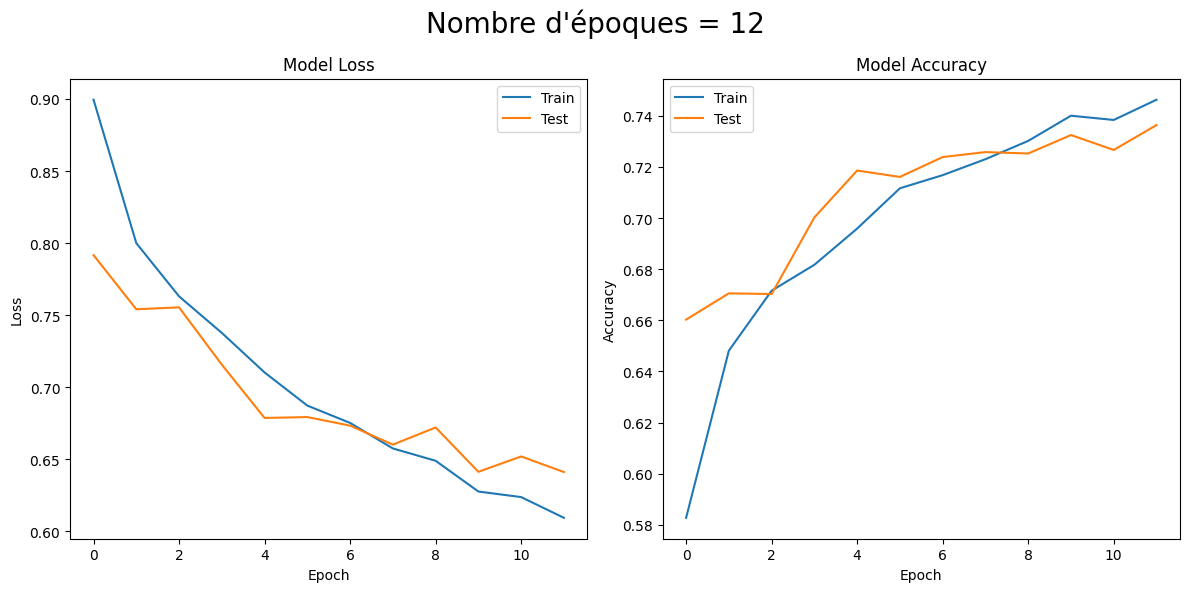

In [20]:
# Tracer la courbe de perte
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(outputs.history['loss'])
plt.plot(outputs.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')

# Tracer la courbe de précision
plt.subplot(1, 2, 2)
plt.plot(outputs.history['categorical_accuracy'])
plt.plot(outputs.history['val_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.suptitle("Nombre d'époques = " + str(len(outputs.history['loss'])), fontsize=20)
plt.tight_layout()
plt.show()

## 3.3. Deep Learning / CONVOLUTIONNAL NEURAL NETWORK (CNN)

In [21]:
X=np.load('X_cifar.npy')
Y=np.load('Y_cifar.npy')

X_train, X_test, y_train, y_test = train_test_split(X/255., Y, test_size=0.2)

In [22]:
Y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
Y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.0005),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()],
)

model.summary()

outputs = model.fit(X_train, Y_train, epochs=12, validation_data=(X_test, Y_test))

print("Train_loss:", outputs.history['loss'])
print("Val_loss:", outputs.history['val_loss'])
print("Train_acc:", outputs.history['categorical_accuracy'])
print("Val_acc:", outputs.history['val_categorical_accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

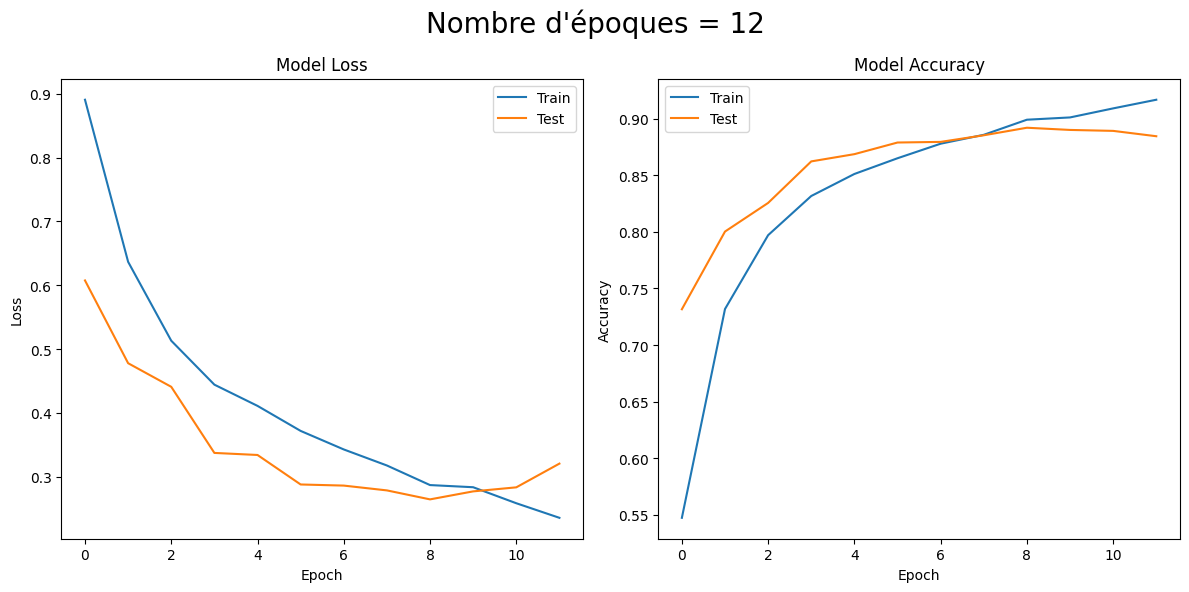

In [23]:
# Tracer la courbe de perte
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(outputs.history['loss'])
plt.plot(outputs.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')

# Tracer la courbe de précision
plt.subplot(1, 2, 2)
plt.plot(outputs.history['categorical_accuracy'])
plt.plot(outputs.history['val_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.suptitle("Nombre d'époques = " + str(len(outputs.history['loss'])), fontsize=20)
plt.tight_layout()
plt.show()